In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from pykrx import stock

pd.options.display.float_format = '{:.5f}'.format  # 지수표현 없이 출력
# pd.reset_option('display.float_format')          # 되돌리기

In [2]:
# 20100101 ~ 20210831 KOSPI 지수
df = stock.get_index_ohlcv_by_date("20100101", "20210831", '1001') 

In [3]:
# 날짜가 index로 되어있어서 column화
df = df.reset_index()

In [4]:
# 필요 컬럼만 남기기(날짜, 종가)
df = df[['날짜','종가']]

In [5]:
# 월별 마지막 날짜(last_day) 컬럼 만들기
df['yyyymm'] = df.날짜.astype(str).apply(lambda x: x.replace("-","")[:6])
df['day'] = df.날짜.astype(str).apply(lambda x: x.replace("-","")[6:]).astype(int)
temp = df.groupby("yyyymm").day.max()
temp = pd.DataFrame(temp)
temp.columns = ['last_day']
df = pd.merge(df,temp,on='yyyymm')

In [6]:
# 월별 마지막 일자 데이터만 남기기
df = df[df.day==df.last_day]
df.reset_index(drop=True, inplace=True)

In [7]:
# df['월수익률'] = 0.0
# 
# for idx, data in df.iterrows() :
#     if idx == 0:
#         continue
#     else:
#         df.loc[idx,'월수익률'] = (data['종가'] / df.loc[idx-1,'종가'] - 1) * 100
# 
# df['기간수익률'] = 0.0
# 
# for idx, data in df.iterrows() :
#     if idx < 12:
#         continue
#     elif df.loc[idx-12,'월수익률'] == 0.0 :
#         df.loc[idx,'기간수익률'] = 0.0
#     else:
#         df.loc[idx,'기간수익률'] = (data['월수익률'] / df.loc[idx-12,'월수익률'] - 1) * 100

# 캡스톤 프로젝트에서 사용할 2011년부터 데이터만 남기기
# df = df.iloc[12:,:]
# df.reset_index(drop=True, inplace=True)
# KOSPI_RETURNS = df[['날짜','yyyymm','종가','월수익률','기간수익률']]
# KOSPI_RETURNS.set_index('날짜',inplace=True, drop=True)
# KOSPI_RETURNS.columns = ['yyyymm','close_price','m_return','one_y_returns']

In [8]:
df['기간수익률'] = 0.0

for idx, data in df.iterrows() :
    if idx < 12:
        continue
    elif df.loc[idx-12,'종가'] == 0.0 :
        df.loc[idx,'기간수익률'] = 0.0
    else:
        df.loc[idx,'기간수익률'] = np.log(data['종가'] / df.loc[idx-12,'종가'])   # (S_T - S_t )/S_t  or ln(S_T/S_t)  (단, T = t + 1년후시점). 지난 1년동안의 수익률.

# 캡스톤 프로젝트에서 사용할 2011년부터 데이터만 남기기
df = df.iloc[12:,:]
df.reset_index(drop=True, inplace=True)
KOSPI_RETURNS = df[['날짜','yyyymm','종가','기간수익률']]
KOSPI_RETURNS.set_index('날짜',inplace=True, drop=True)
KOSPI_RETURNS.columns = ['yyyymm','close_price','one_y_returns']        

In [9]:
KOSPI_RETURNS

,yyyymm,close_price,one_y_returns
날짜,,,
2011-01-31,201101,2069.73000,0.25590
2011-02-28,201102,1939.30000,0.19572
2011-03-31,201103,2106.70000,0.21871
2011-04-29,201104,2192.36000,0.23020
2011-05-31,201105,2142.47000,0.26650
...,...,...,...
2021-04-30,202104,3147.86000,0.48015
2021-05-31,202105,3203.92000,0.45654
2021-06-30,202106,3296.68000,0.44702


In [10]:
KOSPI_RETURNS.describe()

,close_price,one_y_returns
count,128.00000,128.00000
mean,2153.91211,0.04708
std,316.52076,0.14526
min,1754.64000,-0.21774
25%,1977.58000,-0.03210
50%,2032.45000,0.01130
75%,2204.99750,0.10909
max,3296.68000,0.55662


# 시각화

In [11]:
plt.rc('font', family='malgun gothic')
plt.rcParams['axes.unicode_minus'] = False 

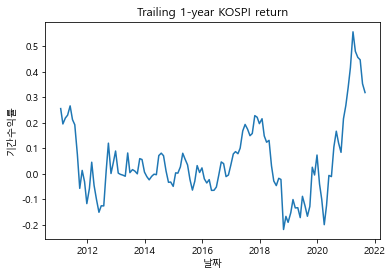

In [12]:
plt.plot(KOSPI_RETURNS.one_y_returns)
plt.title('Trailing 1-year KOSPI return')
plt.xlabel('날짜')
plt.ylabel('기간수익률')
plt.show()

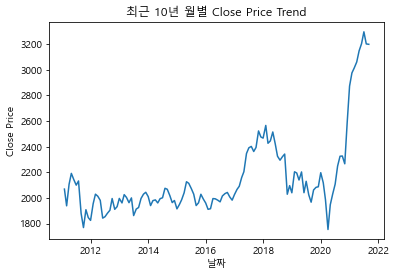

In [13]:
plt.plot(KOSPI_RETURNS.close_price)
plt.title('최근 10년 월별 Close Price Trend')
plt.xlabel('날짜')
plt.ylabel('Close Price')
plt.show()
